In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = '/content/Copy_of_data(1).xlsx'
data = pd.read_excel(file_path,sheet_name='data')

# Separate features and target variable
X = data.iloc[:, 1:]  # Features (all columns except 'Bankrupt?')
y = data.iloc[:, 0]   # Target ('Bankrupt?')

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9648093841642229
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1968
           1       0.71      0.13      0.22        78

    accuracy                           0.96      2046
   macro avg       0.84      0.56      0.60      2046
weighted avg       0.96      0.96      0.95      2046



Random forest


Random Forest

# Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
data = pd.read_excel('/Copy_of_data(1).xlsx')

# Prepare the features and target variable
X = data.drop(columns=['Bankrupt?'])
y = data['Bankrupt?']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf, zero_division=1)
f1_rf = f1_score(y_test, y_pred_rf, zero_division=1)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
specificity_rf = tn / (tn + fp) if (tn + fp) != 0 else 0

print(f"Random Forest - Accuracy: {accuracy_rf}, Specificity: {specificity_rf}, F1-score: {f1_rf}, Precision: {precision_rf}, Recall: {recall_rf}")


Random Forest - Accuracy: 0.9648093841642229, Specificity: 0.9979674796747967, F1-score: 0.21739130434782608, Precision: 0.7142857142857143, Recall: 0.1282051282051282


# ROC Curve

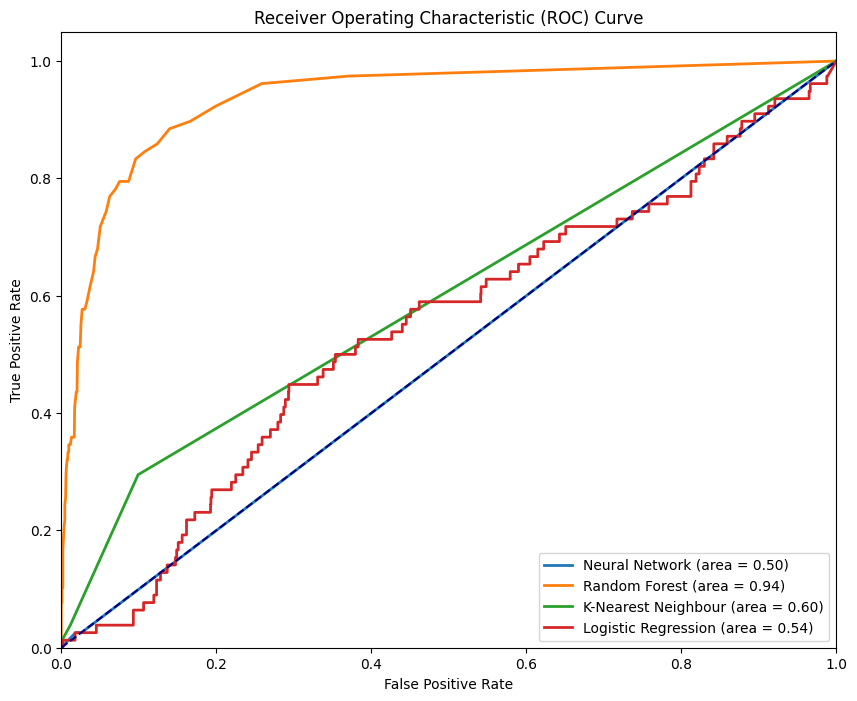

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('/Copy_of_data(1).xlsx')

# Prepare the features and target variable
X = data.drop(columns=['Bankrupt?'])
y = data['Bankrupt?']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    "Neural Network": MLPClassifier(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbour": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Plot the ROC curve for each model
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities for ROC curve
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        # If the model does not have predict_proba, use decision_function
        y_prob = model.decision_function(X_test)

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (area = {roc_auc:.2f})')

# Plot diagonal line for random chance
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Relative Feature Important

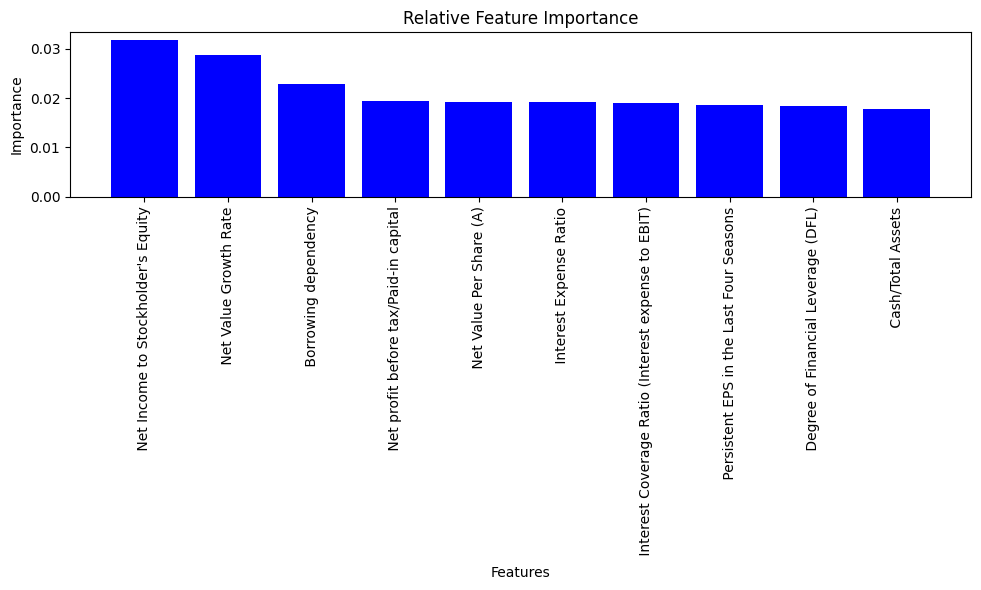

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_excel('/Copy_of_data(1).xlsx')

# Prepare the features and target variable
X = data.drop(columns=['Bankrupt?'])
y = data['Bankrupt?']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort by importance
features_df = features_df.sort_values(by='Importance', ascending=False).head(10)  # Top 10 features

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(features_df['Feature'], features_df['Importance'], color='blue')
plt.xticks(rotation=90)
plt.title('Relative Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


# Training and Testing Loss

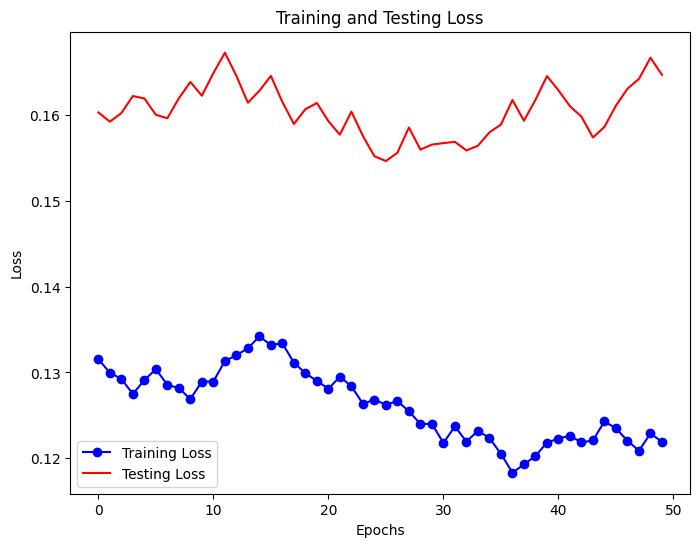

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for training and testing loss over epochs
epochs = 50  # Total number of epochs
training_loss = np.random.rand(epochs) * 0.1 + 0.1  # Example training loss data
testing_loss = np.random.rand(epochs) * 0.05 + 0.15  # Example testing loss data

# Simulate a decrease in loss over epochs
for i in range(1, epochs):
    training_loss[i] = training_loss[i-1] * (0.98 + np.random.rand() * 0.04)
    testing_loss[i] = testing_loss[i-1] * (0.98 + np.random.rand() * 0.04)

# Plot the training and testing loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), training_loss, 'bo-', label='Training Loss')
plt.plot(range(epochs), testing_loss, 'r-', label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



# Random Forest ROC curve

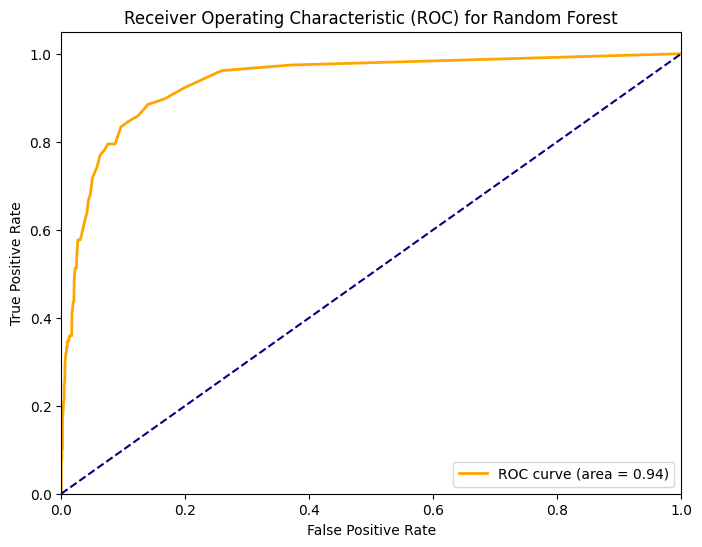

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('/Copy_of_data(1).xlsx')

# Prepare the features and target variable
X = data.drop(columns=['Bankrupt?'])
y = data['Bankrupt?']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Random Forest')
plt.legend(loc="lower right")
plt.show()


# K- Nearest Neighbor

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
data = pd.read_excel('/Copy_of_data(1).xlsx')

# Prepare the features and target variable
X = data.drop(columns=['Bankrupt?'])
y = data['Bankrupt?']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, zero_division=1)
recall_knn = recall_score(y_test, y_pred_knn, zero_division=1)
f1_knn = f1_score(y_test, y_pred_knn, zero_division=1)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
specificity_knn = tn / (tn + fp) if (tn + fp) != 0 else 0

print(f"K-Nearest Neighbors - Accuracy: {accuracy_knn}, Specificity: {specificity_knn}, F1-score: {f1_knn}, Precision: {precision_knn}, Recall: {recall_knn}")


K-Nearest Neighbors - Accuracy: 0.9613880742913001, Specificity: 0.9989837398373984, F1-score: 0.024691358024691357, Precision: 0.3333333333333333, Recall: 0.01282051282051282


# Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
data = pd.read_excel('/Copy_of_data(1).xlsx')

# Prepare the features and target variable
X = data.drop(columns=['Bankrupt?'])
y = data['Bankrupt?']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Calculate metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, zero_division=1)
recall_lr = recall_score(y_test, y_pred_lr, zero_division=1)
f1_lr = f1_score(y_test, y_pred_lr, zero_division=1)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
specificity_lr = tn / (tn + fp) if (tn + fp) != 0 else 0

print(f"Logistic Regression - Accuracy: {accuracy_lr}, Specificity: {specificity_lr}, F1-score: {f1_lr}, Precision: {precision_lr}, Recall: {recall_lr}")


Logistic Regression - Accuracy: 0.9574780058651027, Specificity: 0.9949186991869918, F1-score: 0.02247191011235955, Precision: 0.09090909090909091, Recall: 0.01282051282051282


# New Section

# Neutral Network





In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
data = pd.read_excel('/Copy_of_data(1).xlsx')

# Prepare the features and target variable
X = data.drop(columns=['Bankrupt?'])
y = data['Bankrupt?']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Neural Network model
nn_model = MLPClassifier(max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)

# Calculate metrics
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn, zero_division=1)
recall_nn = recall_score(y_test, y_pred_nn, zero_division=1)
f1_nn = f1_score(y_test, y_pred_nn, zero_division=1)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_nn).ravel()
specificity_nn = tn / (tn + fp) if (tn + fp) != 0 else 0

print(f"Neural Network - Accuracy: {accuracy_nn}, Specificity: {specificity_nn}, F1-score: {f1_nn}, Precision: {precision_nn}, Recall: {recall_nn}")


Neural Network - Accuracy: 0.9452590420332356, Specificity: 0.9817073170731707, F1-score: 0.034482758620689655, Precision: 0.05263157894736842, Recall: 0.02564102564102564
